# Demo Diffprof fits to individual halo histories

In [167]:
import os
from astropy.table import Table
from halotools.sim_manager import CachedHaloCatalog
from halotools.utils import crossmatch
from halotools.utils import sliding_conditional_percentile
from time import time
import matplotlib.cm as cm

drn = "/Users/aphearin/work/DATA/diffprof_data"
t_bpl = np.load("/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/bpl_cosmic_time.npy")
bpl = Table.read(os.path.join(drn, "BPL_halo_table.hdf5"))
bpl_raw = np.load(os.path.join(drn, "bpl_cens_trunks_conc.npy"))
assert np.allclose(bpl['halo_id'], bpl_raw['halo_id'])
bpl['conch_sim'] = bpl_raw['conc']
del bpl_raw
print(bpl.keys())

['halo_id', 'conc_beta_early', 'conc_beta_late', 'conc_k', 'conc_lgtc', 'u_conc_beta_early', 'u_conc_beta_late', 'u_conc_k', 'u_conc_lgtc', 'logmp', 'mah_early', 'mah_late', 'mah_logtc', 'mah_k', 'log_mah_fit', 'conch_fit', 'tform_50', 'p_tform_50', 'conch_sim']


In [168]:
lgm0 = 13.5

mmsk = np.abs(bpl['logmp'] - lgm0) < 0.1
sample = bpl[mmsk]

TARR = np.linspace(1, 13.8, 500)
LGTARR = np.log10(TARR)
LGM_MIN_BPL = 10.5

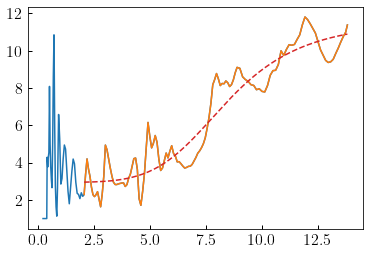

In [169]:
from diffprof.nfw_evolution import lgc_vs_lgt, DEFAULT_CONC_PARAMS
from diffprof.fitting_helpers.fit_nfw_helpers import fit_lgconc


ih = np.random.randint(0, len(sample))

P_DEFAULT = np.array(list(DEFAULT_CONC_PARAMS.values()))

p_best, loss, method, loss_data = fit_lgconc(
    t_bpl, sample['conch_sim'][ih, :], sample['log_mah_fit'][ih, :], LGM_MIN_BPL)

xdata, ydata, msk = loss_data

fig, ax = plt.subplots(1, 1)

__=ax.plot(t_bpl, sample['conch_sim'][ih, :])
__=ax.plot(10**xdata, 10**ydata)

__=ax.plot(10**xdata, 10**lgc_vs_lgt(xdata, *p_best), '--', color=mred)
